<a href="https://colab.research.google.com/github/JongHyun070105/MachineLearning2025/blob/main/3710%EB%B0%95%EC%A2%85%ED%98%84_Chapter5_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0(%EC%8B%A4%EC%8A%B5_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA(Exploratory Data Analysis, 탐색적 데이터 분석)란?
* EDA는 데이터를 본격적으로 분석하거나 모델링하기 전에 데이터를 이해하고 정리하는 과정
* 데이터를 시각화하거나 통계적으로 요약하여, 데이터의 구조, 이상치, 패턴, 변수 간의 관계 등을 파악하는 데 목적

##EDA의 주요 목적
1. 데이터의 분포 파악

  * 수치형 변수: 평균, 중간값, 표준편차, 최대/최소값 등

  * 범주형 변수: 각 범주의 빈도수

2. 결측치와 이상치 확인

  * 결측 데이터(NaN 등)가 어디에 얼마나 있는지

  * 이상값(outliers)을 시각화로 파악 (boxplot 등 활용)

3. 변수 간의 관계 파악

  * 상관관계(correlation), 교차표(crosstab), 산점도(scatter plot) 등 사용

 * 데이터 간의 선형/비선형 관계 확인

4. 데이터 전처리의 기반 마련

 * 데이터 정제, 인코딩, 스케일링 등의 전처리 방향 결정

####EDA는 분석의 출발점이자 핵심적인 기초 작업
####데이터가 어떤 특성을 가지고 있는지 모른 채 모델을 만들면 성능이 낮거나 잘못된 결론에 도달할 수 있습니다.


# SECTION 01. 지표로 데이터 탐색하기

## 1. 일변량 비시각화 탐색하기

### 1) 요약통계량 확인하기
* 수학적 통계 정보는 데이터의 분포를 확인하는 데 유용
* 판다스 describe()

In [1]:
# 판다스 불러오기
import pandas as pd

# 데이터 읽어오기
data = pd.read_csv('./Clean_Dataset.csv')
data

# 지정 인덱스인 첫번째 칼럼 삭제하기
data = data.drop(data.columns[0], axis=1)
data





,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


#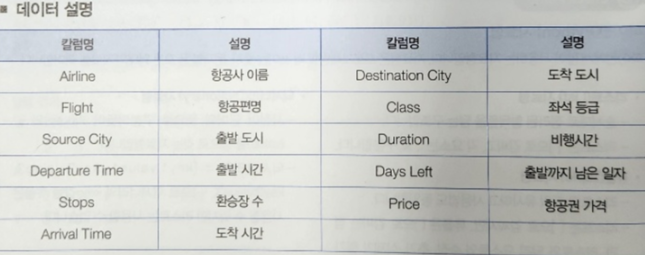

In [3]:
# 수치형 데이터의 요약통계량 확인하기 describe()
# count: 유효한 데이터 수, 평균, 표준편차, 최소값, 최대값
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


# 데이터프레임 전체의 통계 요약 정보를 제공
# 범주형(문자형) 변수까지 함께 요약
# df.describe(include='all')
#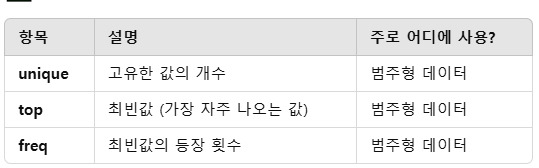




In [4]:
# 범주형(문자형) 변수까지 함께 요약

data.describe(include = 'all')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


### 2) 빈도표 확인하기
###범주형 데이터의 경우 빈도표, 빈도 밀도 등을 구해서 추가 데이터를 탐색할 수 있음.
## value_counts()란?
* value_counts()는 각 고유값이 데이터에서 몇 번 나타나는지 계산하는 Pandas 함수
* 결과는 내림차순으로 정렬되어 가장 많이 등장한 항목이 위에 표시

In [6]:
#### airline, source_city, destination_city의 빈도표 확인하기
# 'airline' 컬럼에서 항공사별로 등장 횟수를 계산
print(data['airline'].value_counts(),'\n')

# 'source_city' 컬럼에서 출발 도시별 등장 횟수를 계산
print(data['source_city'].value_counts(),'\n')


#'destination_city' #컬럼에서 도착 도시별 등장 횟수를 계산
print(data['destination_city'].value_counts())




airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64 

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64 

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64


## 2. 다변량 비시각화 탐색하기

### 1) 상관계수 확인하기
* 상관계수는 두 변수간의 선형 상관관계를 계량화한 수치
* -1 ~ +1 사이의 값을 가짐
* +1에 가까울 수록 강한 양의 상관관계를 의미
* 마이너스(-)에 가까울수록 상관관계가 없는 것이 아니라 0에 가까울 수록 상관관계가 없다는 것
* -1은 완전한 음의 상관관계
* 0: 상관관계가 없음
* +1 :양의 상관관계

##주의사항
###상관관계 ≠ 인과관계: 두 값이 같이 변한다고 해서, 한쪽이 다른 쪽의 원인이라고 볼 수는 없음

###이상치, 결측치, 단위 차이 등에 따라 왜곡될 수 있음


In [9]:
# 데이터의 상관계수 확인하기
# x = df.select_dtypes(include=["number"]) # 숫자형 데이터만 선택
# x.corr()

data.select_dtypes(include = ['number']).corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [13]:
# class를 Economy로 한정하여 새로운 데이터프레임 df_eco 생성하기
data_eco = data[(data['class'] == 'Business')]


# df_eco의 상관계수 확인하기(corr()는 숫자형 데이터 간 상관계수만 계산 가능)
data_eco.select_dtypes(include = ['number']).corr()


,duration,days_left,price
duration,1.000000,-0.026585,0.242731
days_left,-0.026585,1.000000,-0.091289
price,0.242731,-0.091289,1.000000


## 2) 교차표(crosstab) 확인하기
* 상관계수가 수치형 데이터의 상관관계를 이해하는 데 사용되었다면, crosstab은 두 범주형 데이터의 상관관계를 확인 하는 방법
* 상호간의 관련성을 확인하고자 하는 두 특성을 가지고 교차표를 만들어 변수간의 관계를 확인
* 출발도시별로 어느 시간에 이륙이 많은지, 즉 출발도시와 출발시간의 관계 알아보기

In [15]:
# source_city와 departure_time 두 범주형 변수의 변수간의 관계 확인하기(crosstab활)

pd.crosstab(data['source_city'],data['departure_time'])



departure_time,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night
source_city,,,,,,
Bangalore,5183,13611,14243,457,12323,6244
Chennai,5807,9319,5402,72,10550,7550
Delhi,11234,12248,16790,357,13679,7035
Hyderabad,7221,8524,5991,38,9923,9109
Kolkata,7863,8133,9594,114,12065,8578
Mumbai,10486,14955,13082,268,12606,9499


# SECTION 02. 시각화로 데이터 탐색하기
* 데이터의 시각화는 방대한 양의 데이터를 빠르게 확인하고 유의미한 특성을 찾아내는 중요한 작업으로 데이터를 이해하고 분석하는데 여러가지 용도로 사용됨
* 전체적인 데이터의 구조를 시각적으로 분석하거나 방향을 가늠
* 잘못 처리된 데이터가 존재하는지를 확인해서 수정하는데 도움이 됨
* 분석 및 모델링의 결과를 이해하고 의사 결정에 반영하기 쉽도록 보여줌
* 파이썬에서 여러가지 시각화 라이브러리
 - matplotlib, seaborn

##  1. 일변량 시각화 탐색(Maplotlib)하기
* matplotlib을 사용하려면 'figure, plot, show'3가지를 기억
* figure: 시각화 영역을 지정
* plot: 시각화 내용을 표기
* show: 시각화 객체를 출력

### 1) 선 그래프 (line plot)

* 시간이나 순서에 따른 데이터의 연속적인 변화량을 관찰할 때 사용되는 그래프
* 수량을 점으로 표시한 후 해당 점을 선으로 이어서 그려주기 때문에 증가와 감소에 대한 상태 변화를 파악하는 데 유용
* 시간에 따른 기온 변화, 환율변동, 발생추이 등을 쉽게 확인

In [22]:
# 출발까지 남은 일자(days_left)에 따라 항공권 가격이 어떻게 변화되는 지 시각화를 통해 알아보기
# 출발까지 남은 일자(days_left)별 평균 데이터 만들기
days_left_mean = data.groupby('days_left')[['duration','price']].mean(numeric_only = True)

days_left_mean

,duration,price
days_left,,
1,14.250228,21591.867151
2,14.111080,30211.299801
3,14.287476,28976.083569
4,13.742667,25730.905653
5,12.921970,26679.773368
6,12.497056,24856.493902
7,12.596291,25588.367351
8,12.419870,24895.883995
9,12.787071,25726.246072


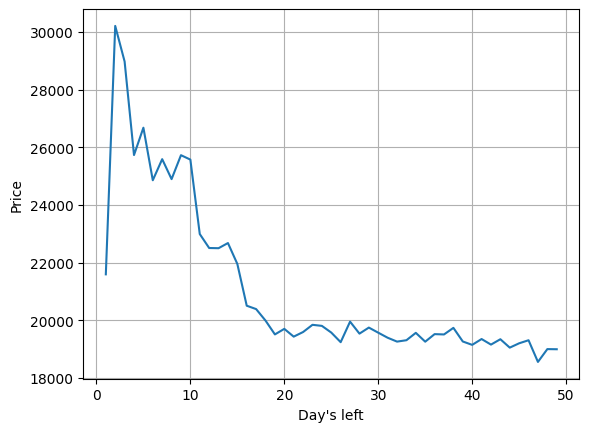

In [24]:
# 시각화 라이브러리 불러오기
import matplotlib.pyplot as plt


# 시각화 영역(figure) 지정하기
plt.figure()

# days_left의 price 데이터로 선 그래프 그리기
plt.plot(days_left_mean['price'])


# X축 이름 지정하기
plt.xlabel("Day's left")

# Y축 이름 지정하기
plt.ylabel('Price')

# 그리드 표현
plt.grid(True)

# 시각화 표기하기
plt.show()

### 2) 막대 그래프(bar plot)

In [29]:
# airline별 평균 데이터 만들기

air_mean = data.groupby('airline')['price'].mean(numeric_only = True)



<BarContainer object of 6 artists>

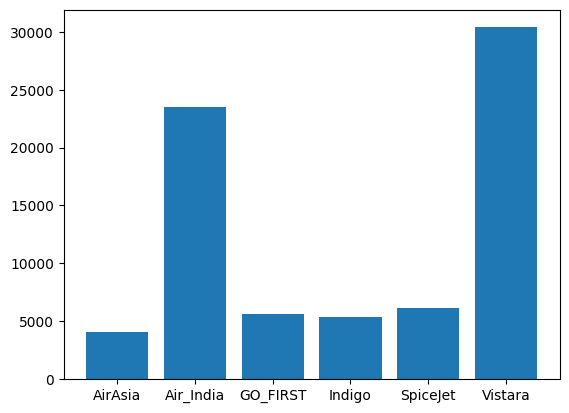

In [32]:
# # airline 데이터프레임의 인덱스를 label 변수에 저장
label = air_mean.index


#figure생성
plt.figure()


# 인덱스를 X, 평균가격을 Y로 하는 막대 그래프 그리기
plt.bar(label, air_mean)




### 3) 파이 그래프(pie plot)
* 항공편의 출발 시간대(departure_time)가 어떻게 분포되어 있는지를 파이 차트로 시각화

([<matplotlib.patches.Wedge at 0x7e6bf26c6650>,
 [Text(-0.7454934984222548, 0.808850693150564, 'Morning'),
  Text(-0.8968046084266099, -0.6369784096064756, 'Early_Morning'),
  Text(0.45581504376889853, -1.0011157005431277, 'Evening'),
  Text(1.0991016834411333, 0.04444647856542619, 'Night'),
  Text(0.5537895436728401, 0.950429977072813, 'Afternoon'),
  Text(0.015035600119575096, 1.0998972364403161, 'Late_Night')],
 [Text(-0.4066328173212298, 0.44119128717303485, '&.1f%'),
  Text(-0.4891661500508781, -0.34744276887625936, '&.1f%'),
  Text(0.24862638751030827, -0.5460631093871605, '&.1f%'),
  Text(0.599510009149709, 0.024243533762959738, '&.1f%'),
  Text(0.3020670238215491, 0.5184163511306252, '&.1f%'),
  Text(0.008201236428859142, 0.5999439471492632, '&.1f%')])

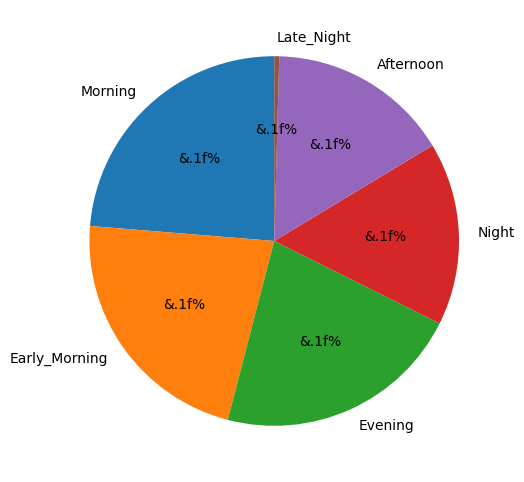

In [34]:
# departure_time 빈도표 데이터 만들기
# 카테고리(범주형) 데이터의 개수 세기
# 결과는 출발 시간대별 항공편 수
dt = data['departure_time'].value_counts()

# figure 생성
plt.figure(figsize = (10,6))
# departure_time 빈도표 데이터로 파이 그래프 그리기
# 각 조각의 비율 (예: 값이 있는 시리즈나 리스트)
# 각 조각에 대한 라벨 (예: '오전', '오후', '저녁', '심야')
# 퍼센트 표시 형식 (소수점 첫째 자리까지, 예: 23.5%)
# 파이 차트를 그릴 때 시작 각도 (90도는 12시 방향부터 시작)


plt.pie(dt, labels = dt.index, autopct='&.1f%%',startangle = 90)



### 4) 도수분포표(histogram)
* 데이터를 여러 구간(=bin, 구획)으로 나눈 뒤, 각 구간에 속한 데이터의 개수를 세어 막대로 나타낸 것
* 히스토그램은 데이터 분포를 한눈에 보여주는 강력한 도구
* 막대그래프처럼 생겼지만, 범주형이 아니라 연속형(수치데이터) 변수에 사용

* EDA(탐색적 데이터 분석)의 필수 시각화 중 하나

* Matplotlib의 plt.hist()로 쉽게 만들 수 있음

### 목적지까지 소요시간의 분포를 확인하기
* duration(비행 시간) 데이터를 가지고, 히스토그램을 두 가지 다른 bin(구간) 수로 시각화하여 비교하는 것


<ipython-input-36-c884cbe941d1>:15: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('Bin 10','Bin 20')


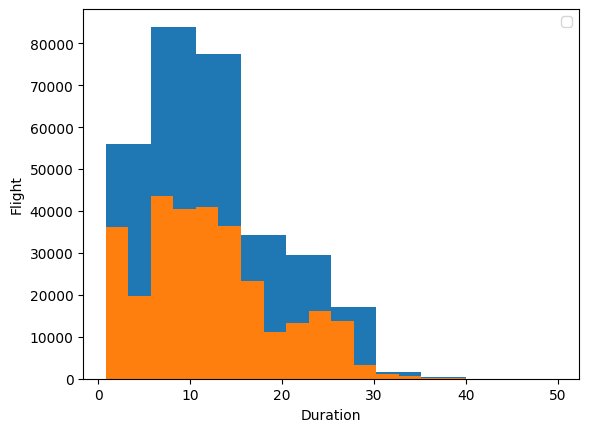

In [36]:
 #하나의 그래프 영역에 여러 히스토그램을 그리기 위한 설정
plt.figure()

# duration을 10개 구간으로 나눠서 히스토그램 그리기
plt.hist(data['duration'],bins = 10)

# duration을 20개 구간으로 나눠서 히스토그램 그리기
plt.hist(data['duration'],bins = 20)

#X,Y레이블 생성
plt.xlabel('Duration')
plt.ylabel('Flight')

# 동시에 2개의 그래프를 하나의 시각화 영역에 그려 범례 지정하기
plt.legend('Bin 10','Bin 20')
plt.show()

### 5) 상자 그래프(box plot)

##사분위수를 중심으로 수치적 요약 통계 자료를 시각화하는 그래프
* 수치자료로 얻어낸 5가지 (최소값, 1사분위수, 중앙값, 3사분위수, 최대값)을 가지고 그래프를 만듦
* 분포와 이상치를 한눈에 파악할 수 있는 시각화 도구
* boxplot은 특히 **중앙값, 사분위수, 이상치(outlier)**를 시각적으로 확인할 수 있다는 점에서 매우 유용
* Box Plot이란?
데이터의 분포, 중앙값, 퍼짐 정도, 이상치까지 요약해 보여주는 그래프

##
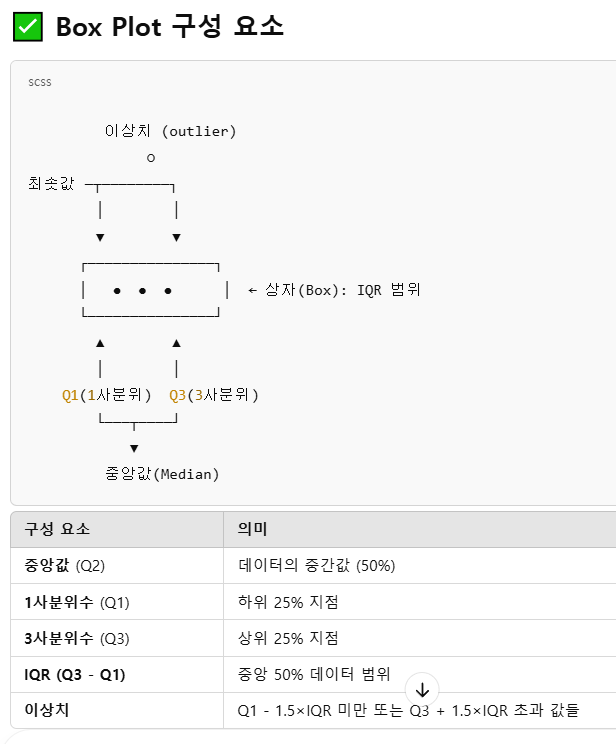

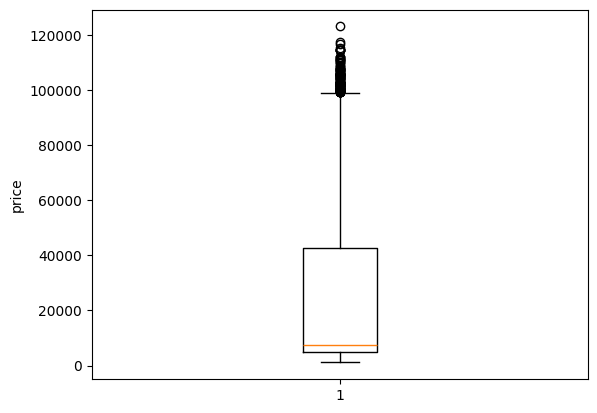

In [37]:
# import matplotlib.pyplot as plt

# 새로운 도화지(figure) 생성
# → 여러 그래프를 그릴 때 이전 그래프와 겹치지 않도록 새 창을 열어주는 역할
plt.figure()

# 'price' 열의 데이터를 리스트로 변환하여 박스플롯(boxplot) 생성
# → 박스플롯은 중앙값, 사분위수, 이상치 등 가격 데이터의 분포를 시각적으로 보여줌
plt.boxplot(list(data['price']))

# y축 레이블을 'price'로 설정
plt.ylabel('price')

# 그래프 출력
plt.show()

<Axes: title={'center': 'price'}, xlabel='departure_time'>

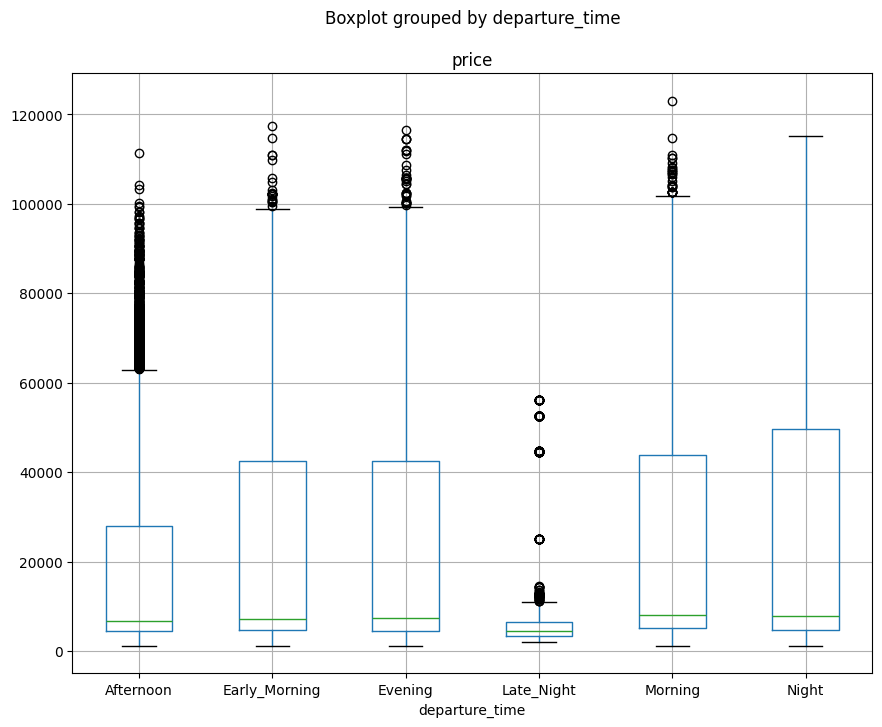

In [39]:
# departure_time별로 price에 대한 상자 그래프 그리기
# 'departure_time'을 기준으로 그룹을 나누고,
# 각 그룹별 'price' 데이터에 대해 박스플롯을 그림
# 그룹 기준 (예: 오전, 오후, 저녁, 심야 등)
# 박스플롯을 그릴 대상 열
# 그래프의 가로, 세로 크기 지정 (단위: 인치)

data.boxplot(by='departure_time',column='price', figsize=(10,8))



## 2. 다변량 시각화 탐색하기

### 1) 산점도(scatter plot)
* 2개의 연속형 변수의 관계를 보기 위해 좌표의 x축과 y축에 표시하는 점들을 찍어서 만드는 그래프
* 산점도에 표기되는 점들은 자료의 관측값을 나타냄
* 두 변수간의 상관관계를 대략적으로 확인할 수 있음

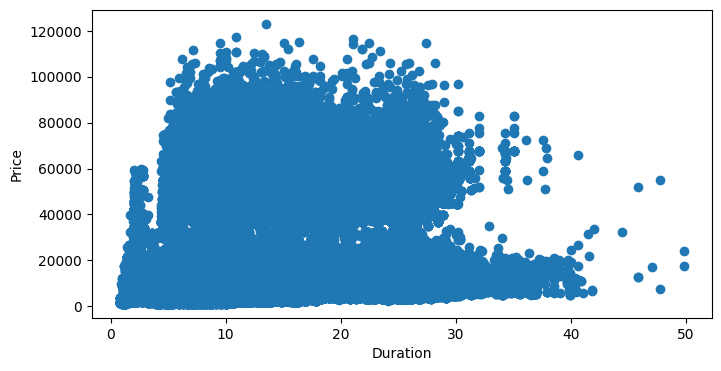

In [40]:
#비행시간과 항공권가격 상관관계 알아보기
import matplotlib.pyplot as plt

# 가로 8인치, 세로 4인치 크기의 새 도화지(figure) 생성
plt.figure(figsize=(8,4))

# 'duration'(지속 시간)을 x축, 'price'(가격)를 y축으로 하는 산점도 그리기
# → 각 점은 하나의 관측값이며, 두 변수 간의 관계를 시각적으로 표현
plt.scatter(data['duration'], data['price'])

# x축 라벨을 'Duration'으로 설정
plt.xlabel('Duration')

# y축 라벨을 'Price'로 설정
plt.ylabel('Price')

# 그래프 출력
plt.show()

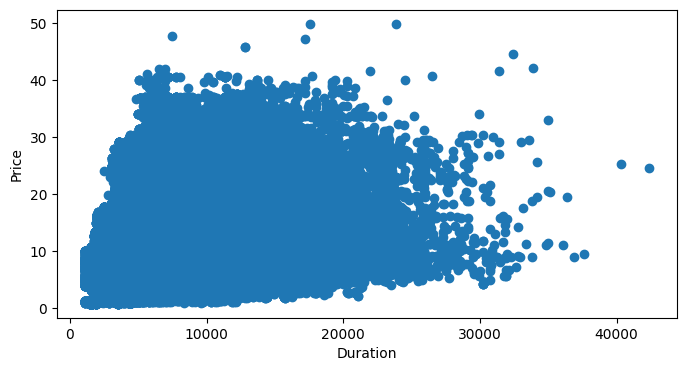

In [43]:
import matplotlib.pyplot as plt

df_eco = data[data['class'] == 'Economy']
# 가로 8인치, 세로 4인치 크기의 새 도화지 생성
# → 그래프의 크기를 설정하여 보기 좋게 조정
plt.figure(figsize=(8,4))

# 'Economy' 클래스만 필터링한 데이터프레임(df_eco)에서
# duration을 x축, price를 y축으로 하는 산점도(Scatter Plot) 그리기
# → 각각의 점은 하나의 항공편을 의미하며, 시간과 가격 간의 관계를 시각화
# x축: 비행 시간(Duration)
# y축: 항공권 가격(Price)

plt.scatter(x=df_eco['price'],y = df_eco['duration'])

# x축 라벨 설정
plt.xlabel('Duration')

# y축 라벨 설정
plt.ylabel('Price')

# 그래프 보여주기
plt.show()

### 2) 히트맵(heatmap)
* 데이터의 배열을 색상으로 표현해 주는 그래프
* 여러 카테고리 값의 변화를 한눈에 볼 수 있기 때문에 두 값 또는 각 칼럼 간의 상관관계를 나타낼 때 주로 사용


In [ ]:
# numpy 불러오기
import numpy as np


# class를 Economy로 한정하여 새로운 데이터프레임 df_eco 생성하기



# # df_eco의 상관계수 확인하기(corr()는 숫자형 데이터 간 상관계수만 계산 가능)
# df_eco_numeric = df_eco.select_dtypes(include=["number"])
# df_eco_numeric.corr()
#-------------------------------

# 상관계수 데이터 만들기


# 상관계수로 heatmap그리기


# x축 항목 정보 표기하기


# y축 항목 정보 표기하기


# 히트맵 확인을 위한 컬러바 표기하기




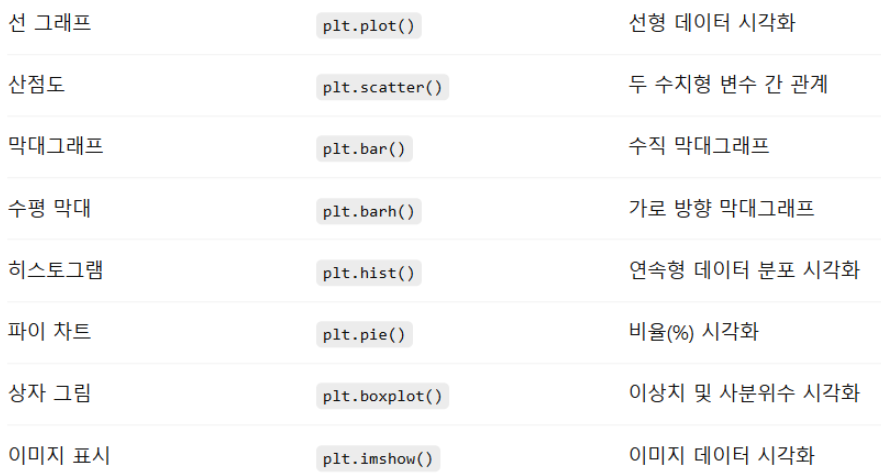

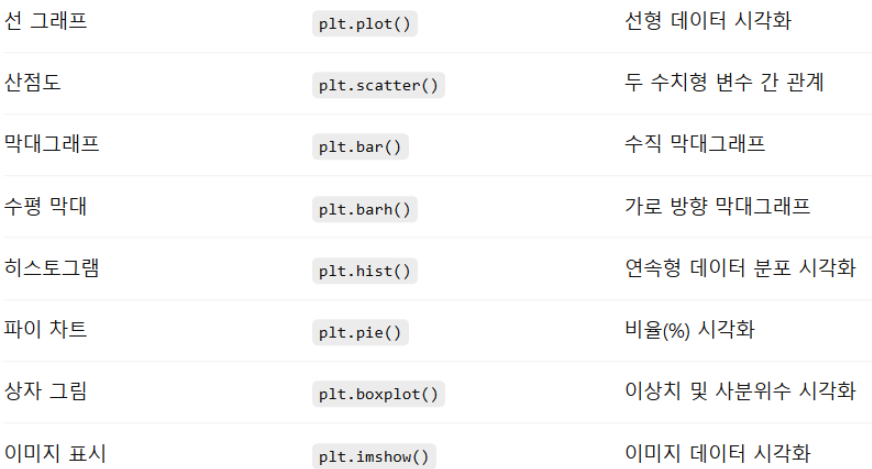

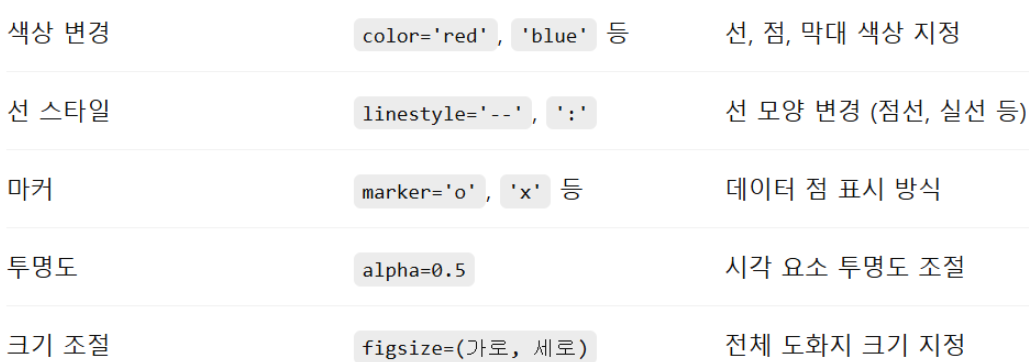

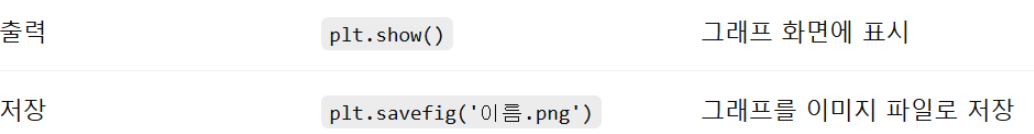